# Swish-based classifier using cosine-annealed LR with restarts and data augmentation
- Swish activation, 4 layers, 100 neurons per layer
- LR using cosine-annealing with restarts and cycle multiplicity of 2
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

Using TensorFlow backend.


## Options

In [2]:
with open(dirLoc + 'features.pkl', 'rb') as fin:
    classTrainFeatures = pickle.load(fin)

In [6]:
nSplits = 10
patience = 2
maxEpochs = 200

ensembleSize = 10
ensembleMode = 'loss'

compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':'modelSwish', 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs, 'mode':'classifier'}

custom_objects = {'swish': swish}

print ("\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures])

('\nTraining on', 31, 'features:', ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py'])


## Import data

In [4]:
with open(dirLoc + 'inputPipe.pkl', 'rb') as fin:
    inputPipe = pickle.load(fin)

In [5]:
trainData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'train.hdf5', "r"),
                                    inputPipe=inputPipe, augRotMult=16)

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 23.815s 


/nfs/dust/cms/user/tholenhe/installs/anaconda2/envs/hepML3/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


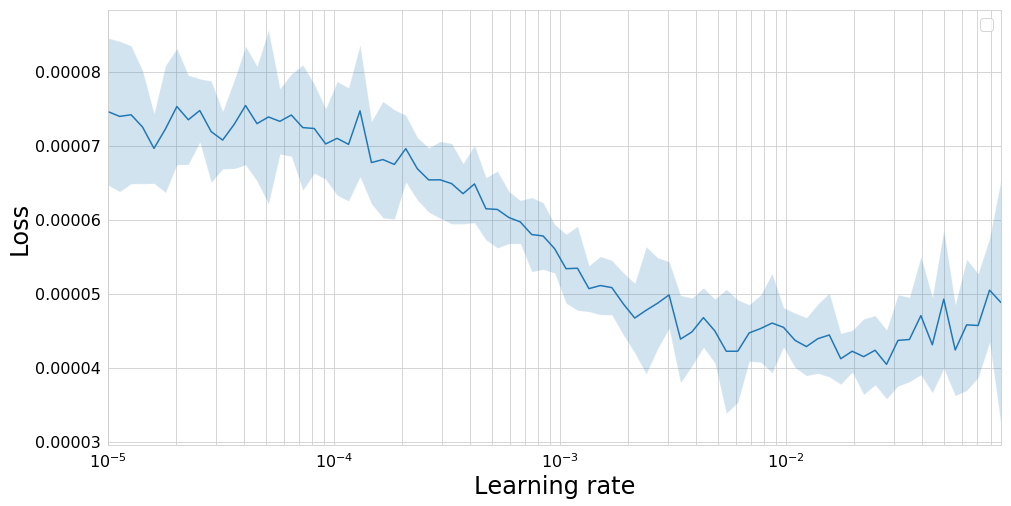

______________________________________



In [6]:
lrFinder = batchLRFind(trainData, getModel, modelParams, trainParams,
                       lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

## Train classifier

In [ ]:
newModelArgs = modelParams.copy()
newModelArgs['compileArgs'] = compileArgs.copy()
newModelArgs['compileArgs']['lr'] = 2e-3

Using cosine annealing
Training using weights
Running fold 1 / 10
.2 classes found, running in binary mode


1 New best found: 3.98665406476e-05
.
2 New best found: 3.77084449404e-05
.
3 New best found: 3.62940623162e-05
.
4 New best found: 3.62694757665e-05
.
5 New best found: 3.56538839973e-05
.
6 New best found: 3.49917400101e-05
.
7 New best found: 3.48734549123e-05
....
11 New best found: 3.45944225022e-05
.
12 New best found: 3.42944920949e-05
.
13 New best found: 3.39254249321e-05
.
14 New best found: 3.38724366803e-05
.......
21 New best found: 3.37270348471e-05
..
23 New best found: 3.37270047255e-05
.
24 New best found: 3.35368112668e-05
...
27 New best found: 3.34013584561e-05
.
28 New best found: 3.33841018577e-05
.
29 New best found: 3.32490242664e-05
.
30 New best found: 3.31592982945e-05
.
31 New best found: 3.30763268364e-05
.................
48 New best found: 3.29601809674e-05
..
50 New best found: 3.28763300293e-05
.......
57 New best found: 3.282117969e-05
..
59 New

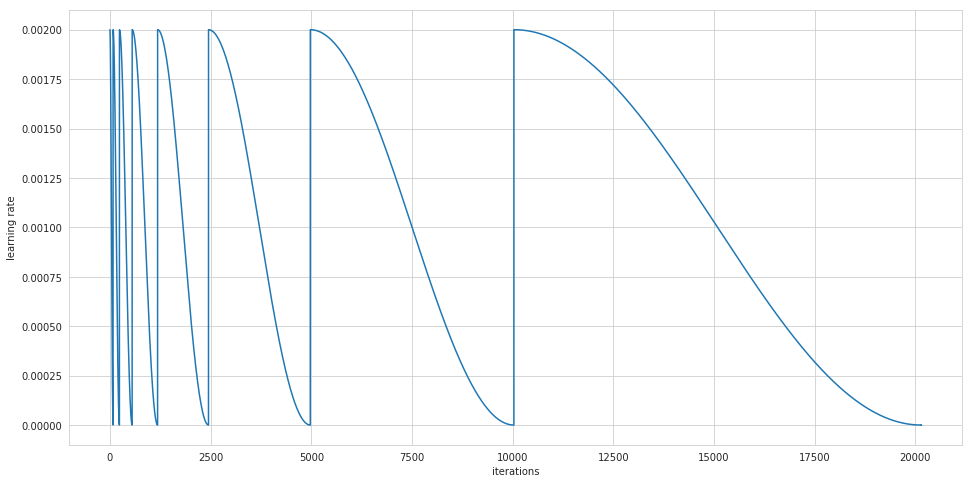

Fold took 397.116s

Running fold 2 / 10
.
1 New best found: 3.96074389725e-05
.
2 New best found: 3.72169419858e-05
.
3 New best found: 3.63944794542e-05
.
4 New best found: 3.60805993081e-05
.
5 New best found: 3.56028365764e-05
.
6 New best found: 3.50626045943e-05
.
7 New best found: 3.4904236941e-05
....
11 New best found: 3.44356467239e-05
.
12 New best found: 3.43179479362e-05
.
13 New best found: 3.40750869598e-05
.
14 New best found: 3.38267881575e-05
........
22 New best found: 3.37809379981e-05
.
23 New best found: 3.36866470511e-05
...
26 New best found: 3.34036175855e-05
.
27 New best found: 3.32114026341e-05
.
28 New best found: 3.31848818205e-05
.
29 New best found: 3.31589415163e-05
.
30 New best found: 3.31216354907e-05
.....................
51 New best found: 3.29037269833e-05
...
54 New best found: 3.27758339532e-05
...
57 New best found: 3.27398058117e-05
.
58 New best found: 3.26816041592e-05
....
62 New best found: 3.26592575191e-05
................................

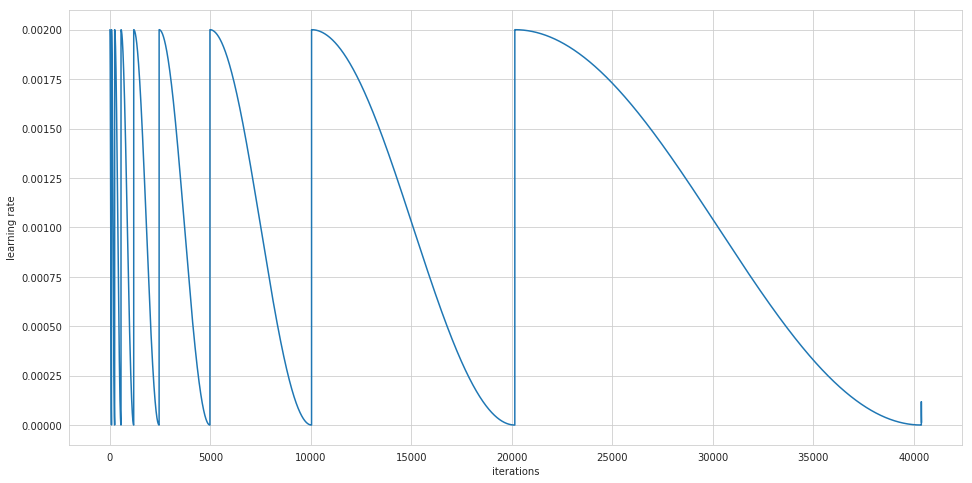

Fold took 794.050s

Running fold 3 / 10
.
1 New best found: 3.91422155538e-05
.
2 New best found: 3.68835869299e-05
.
3 New best found: 3.60270645753e-05
.
4 New best found: 3.58741554216e-05
.
5 New best found: 3.47733422103e-05
.
6 New best found: 3.46599232522e-05
.
7 New best found: 3.44213893867e-05
..
9 New best found: 3.42553960517e-05
...
12 New best found: 3.37802685965e-05
.
13 New best found: 3.35279690553e-05
..
15 New best found: 3.34591477757e-05
........
23 New best found: 3.30199491061e-05
..
25 New best found: 3.29492529646e-05
..
27 New best found: 3.28283318553e-05
..
29 New best found: 3.27015259281e-05
..
31 New best found: 3.26465212776e-05
................
47 New best found: 3.24691190986e-05
...
50 New best found: 3.24573051383e-05
...
53 New best found: 3.24538941234e-05
.
54 New best found: 3.23945501048e-05
.
55 New best found: 3.23213366474e-05
...
58 New best found: 3.21725568197e-05
...................................
93 New best found: 3.21419431118e-05
.

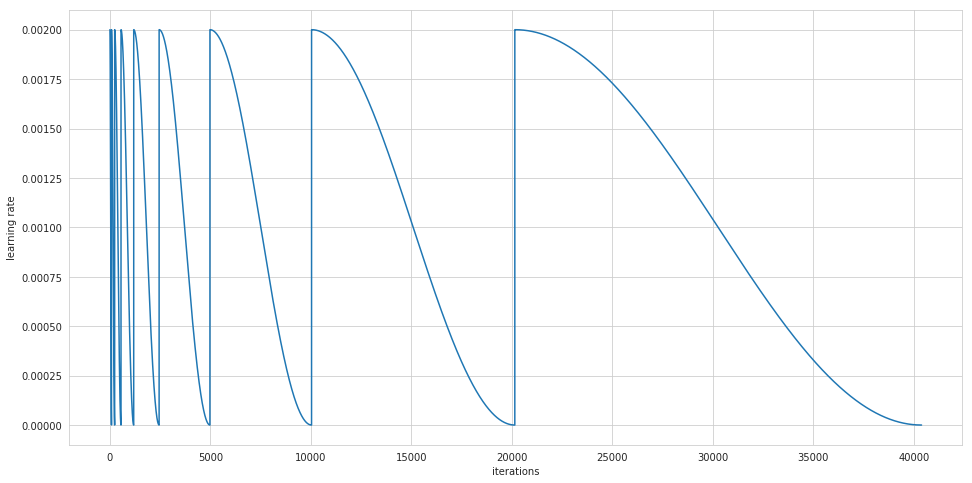

Fold took 798.742s

Running fold 4 / 10
.
1 New best found: 3.97143403432e-05
.
2 New best found: 3.64737402633e-05
.
3 New best found: 3.58543441194e-05
..
5 New best found: 3.48529993906e-05
.
6 New best found: 3.47721189115e-05
.
7 New best found: 3.45492764027e-05
..
9 New best found: 3.44473218516e-05
.
10 New best found: 3.42557303331e-05
.
11 New best found: 3.38204036583e-05
.
12 New best found: 3.34720757783e-05
..
14 New best found: 3.33318018878e-05
.
15 New best found: 3.32698441445e-05
......
21 New best found: 3.32557620553e-05
.
22 New best found: 3.32057633539e-05
..
24 New best found: 3.27767904091e-05
...
27 New best found: 3.27184763955e-05
.
28 New best found: 3.26844437506e-05
.
29 New best found: 3.25684203948e-05
.................
46 New best found: 3.23980397428e-05
......
52 New best found: 3.22645598557e-05
..
54 New best found: 3.20876822108e-05
......
60 New best found: 3.20807515658e-05
..
62 New best found: 3.20734383116e-05
.
63 New best found: 3.20506214

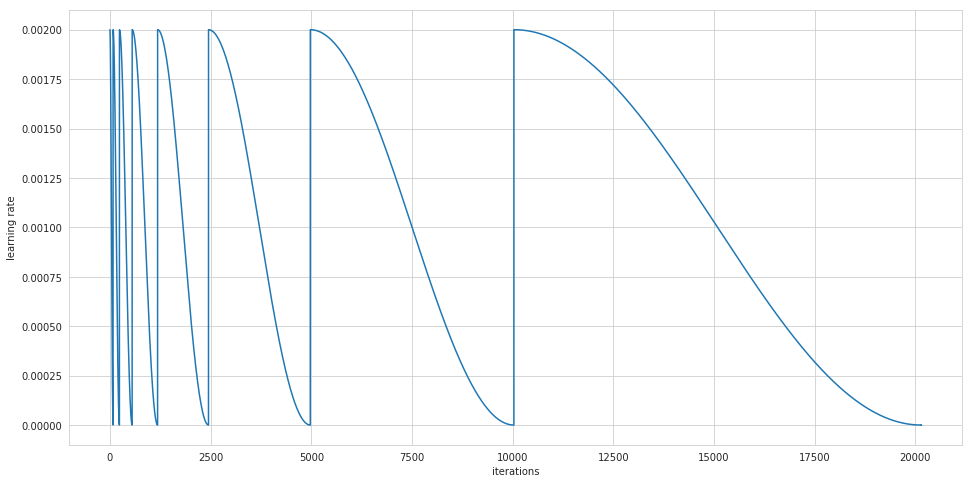

Fold took 432.206s

Running fold 5 / 10
.
1 New best found: 3.93626588135e-05
.
2 New best found: 3.66483976366e-05
.
3 New best found: 3.59346371231e-05
..
5 New best found: 3.48498935928e-05
.
6 New best found: 3.4680212391e-05
.
7 New best found: 3.40933237749e-05
....
11 New best found: 3.39907358182e-05
.
12 New best found: 3.34695923622e-05
..
14 New best found: 3.32921202877e-05
.
15 New best found: 3.31441068804e-05
........
23 New best found: 3.3106658906e-05
.
24 New best found: 3.27903967816e-05
...
27 New best found: 3.26900164029e-05
..
29 New best found: 3.26740980716e-05
.
30 New best found: 3.2497229836e-05
..............
44 New best found: 3.2497101443e-05
....
48 New best found: 3.23749397634e-05
..
50 New best found: 3.23046591904e-05
...
53 New best found: 3.22608959352e-05
.
54 New best found: 3.22265314564e-05
.
55 New best found: 3.22170920612e-05
.
56 New best found: 3.21771280724e-05
.
57 New best found: 3.19909436992e-05
.....
62 New best found: 3.19260403718e

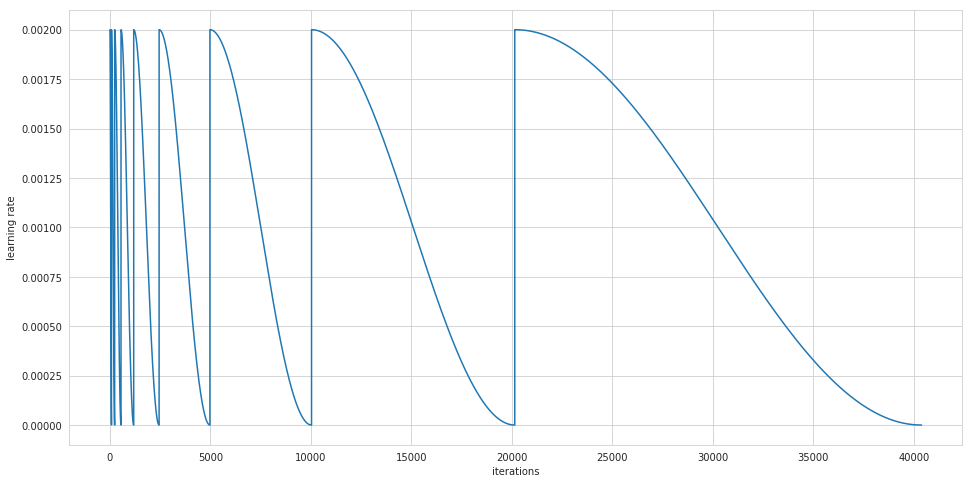

Fold took 828.534s

Running fold 6 / 10
.
1 New best found: 3.93177700098e-05
.
2 New best found: 3.67729524791e-05
.
3 New best found: 3.64298103581e-05
.
4 New best found: 3.54986697232e-05
..
6 New best found: 3.49558802278e-05
.
7 New best found: 3.4630597409e-05
..
9 New best found: 3.45173065216e-05
.
10 New best found: 3.42150476921e-05
..
12 New best found: 3.37315925848e-05
.
13 New best found: 3.36210314141e-05
.
14 New best found: 3.34573853746e-05
.
15 New best found: 3.34204033628e-05
........
23 New best found: 3.29459728178e-05
...
26 New best found: 3.28384621025e-05
.
27 New best found: 3.28271824299e-05
.
28 New best found: 3.26665332657e-05
.
29 New best found: 3.25820511891e-05
.
30 New best found: 3.2554794391e-05
................
46 New best found: 3.24858102191e-05
......
52 New best found: 3.24246488497e-05
.
53 New best found: 3.23986194635e-05
..
55 New best found: 3.22743043667e-05
.
56 New best found: 3.21923418116e-05
..
58 New best found: 3.21676859574e-05

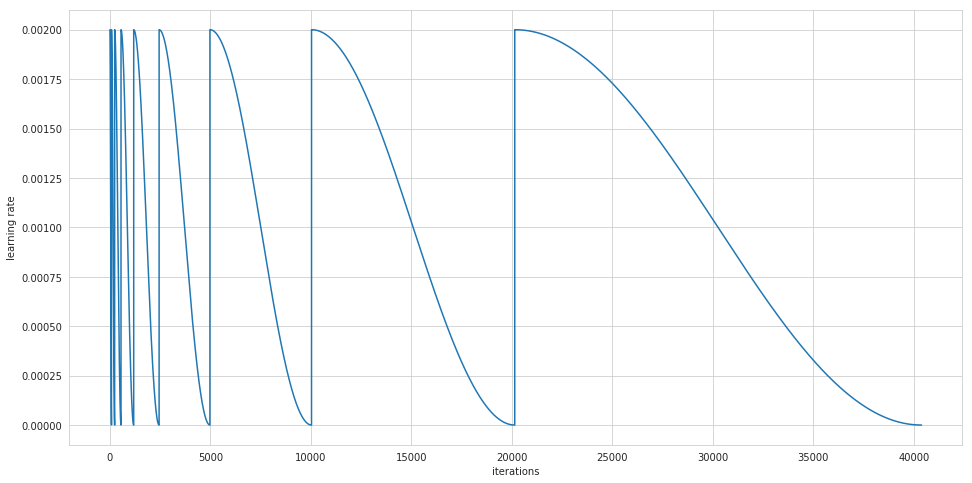

Fold took 804.722s

Running fold 7 / 10
.
1 New best found: 3.9045399407e-05
.
2 New best found: 3.62657323785e-05
.
3 New best found: 3.56387458014e-05
..
5 New best found: 3.45062859313e-05
.
6 New best found: 3.42325307996e-05
.
7 New best found: 3.42316971335e-05
...
10 New best found: 3.39445147431e-05
.
11 New best found: 3.36585407626e-05
.
12 New best found: 3.34547440027e-05
.
13 New best found: 3.33331843591e-05
.
14 New best found: 3.31817630809e-05
......
20 New best found: 3.30245235353e-05
...
23 New best found: 3.27758829575e-05
.
24 New best found: 3.26408035355e-05
..
26 New best found: 3.25729724864e-05
.
27 New best found: 3.24592607823e-05
.
28 New best found: 3.22034780358e-05
..
30 New best found: 3.21931265978e-05
.
31 New best found: 3.21606077137e-05
................
47 New best found: 3.20541281631e-05
...
50 New best found: 3.18960013799e-05
.....
55 New best found: 3.17898824418e-05
.
56 New best found: 3.16271050266e-05
.....................................

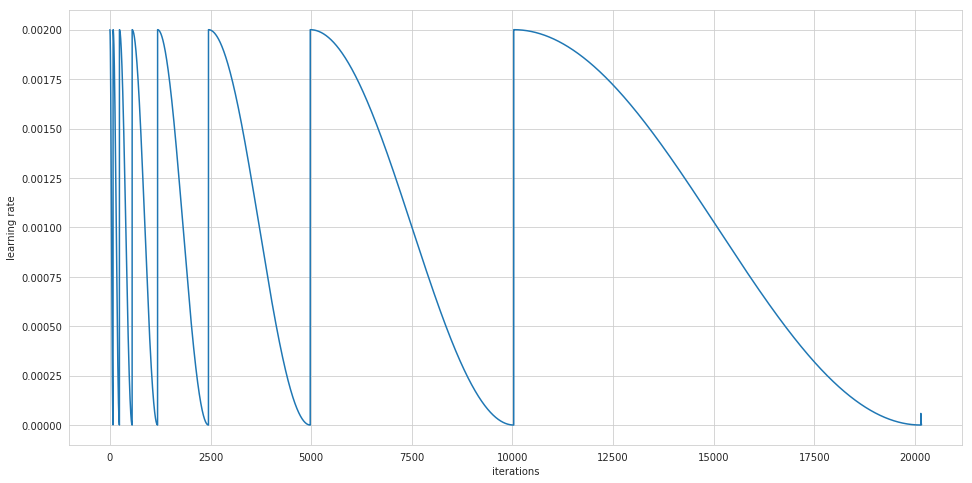

Fold took 410.408s

Running fold 8 / 10
.
1 New best found: 3.89528699358e-05
.
2 New best found: 3.69182221964e-05
.
3 New best found: 3.55738292333e-05
..
5 New best found: 3.46423517261e-05
.
6 New best found: 3.43806761776e-05
.
7 New best found: 3.42368192818e-05
....
11 New best found: 3.35417379753e-05
..
13 New best found: 3.32021992058e-05
.
14 New best found: 3.30977267287e-05
.......
21 New best found: 3.29608791125e-05
..
23 New best found: 3.27657761478e-05
.
24 New best found: 3.26412200842e-05
.
25 New best found: 3.25827174574e-05
..
27 New best found: 3.24046118768e-05
.
28 New best found: 3.23783424161e-05
.
29 New best found: 3.22270628151e-05
.................
46 New best found: 3.21968898117e-05
.
47 New best found: 3.21402030009e-05
...
50 New best found: 3.20653448911e-05
..
52 New best found: 3.18097339217e-05
.......
59 New best found: 3.18086776923e-05
.
60 New best found: 3.17193399725e-05
....................................
96 New best found: 3.17189099048e

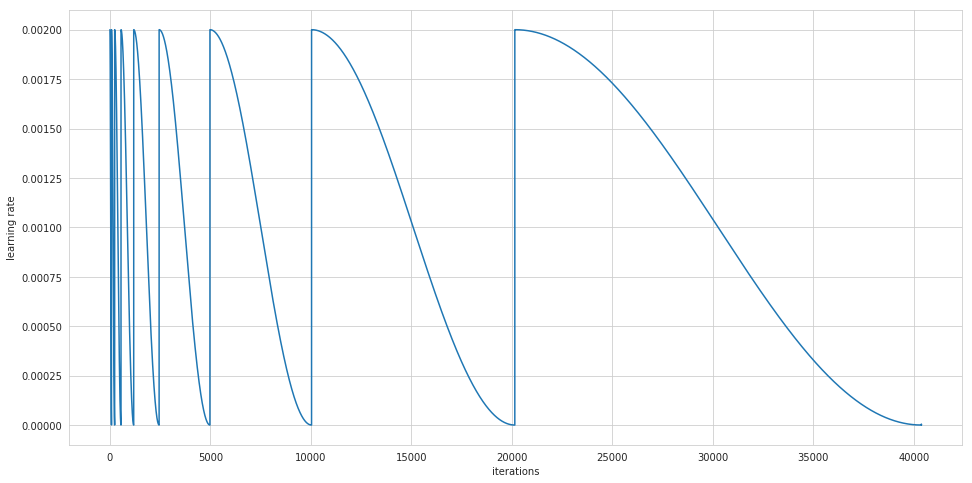

Fold took 824.896s

Running fold 9 / 10
.
1 New best found: 4.03019187446e-05
.
2 New best found: 3.67291430077e-05
.
3 New best found: 3.60968867324e-05
.
4 New best found: 3.58230129625e-05
.
5 New best found: 3.56834335918e-05
.
6 New best found: 3.44973441849e-05
....
10 New best found: 3.44144221324e-05
.
11 New best found: 3.39558494216e-05
...
14 New best found: 3.37620265941e-05
.
15 New best found: 3.3680837056e-05
.....
20 New best found: 3.36001265135e-05
...
23 New best found: 3.33723228261e-05
.
24 New best found: 3.32145682284e-05
...
27 New best found: 3.30006009576e-05
.
28 New best found: 3.2975594182e-05
..................
46 New best found: 3.28427535355e-05
....
50 New best found: 3.27208052754e-05
.
51 New best found: 3.26741612405e-05
.
52 New best found: 3.26663414328e-05
.
53 New best found: 3.26625320722e-05
.
54 New best found: 3.26328048622e-05
.
55 New best found: 3.25049155481e-05
.
56 New best found: 3.24461759424e-05
.
57 New best found: 3.23706009406e-05

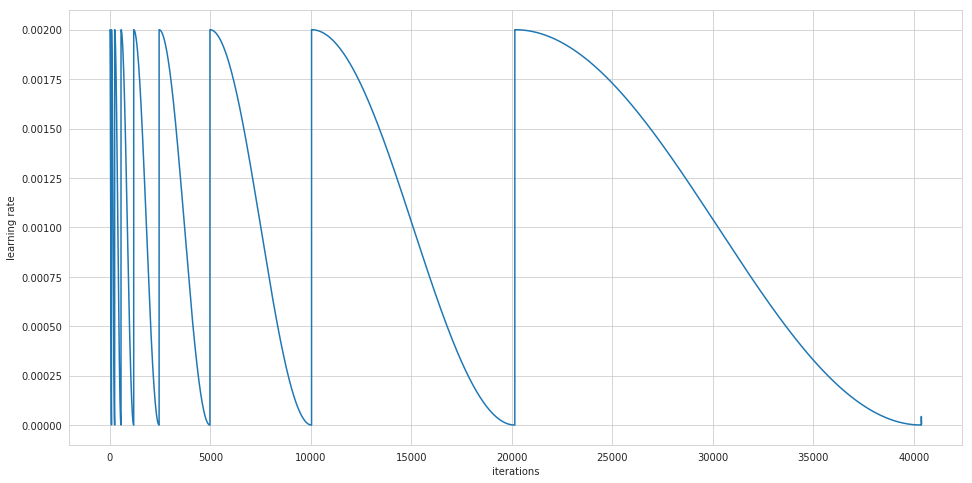

Fold took 908.911s

Running fold 10 / 10
.
1 New best found: 4.07476539274e-05
.
2 New best found: 3.82923862079e-05
.
3 New best found: 3.6540715147e-05
.
4 New best found: 3.62386032168e-05
.
5 New best found: 3.56179620774e-05
.
6 New best found: 3.51713424327e-05
...
9 New best found: 3.46096565884e-05
.
10 New best found: 3.43418931733e-05
..
12 New best found: 3.42981572245e-05
.
13 New best found: 3.38759844184e-05
.
14 New best found: 3.38586634843e-05
.
15 New best found: 3.38207507037e-05
.......
22 New best found: 3.37784097362e-05
.
23 New best found: 3.35497964506e-05
.
24 New best found: 3.32662724234e-05
..
26 New best found: 3.31010455073e-05
..
28 New best found: 3.30543502048e-05
.
29 New best found: 3.30477848809e-05
..
31 New best found: 3.30096775095e-05
..................
49 New best found: 3.29875352029e-05
.
50 New best found: 3.2832622822e-05
.
51 New best found: 3.26584582825e-05
.......
58 New best found: 3.25911942416e-05
.
59 New best found: 3.25292764172e-

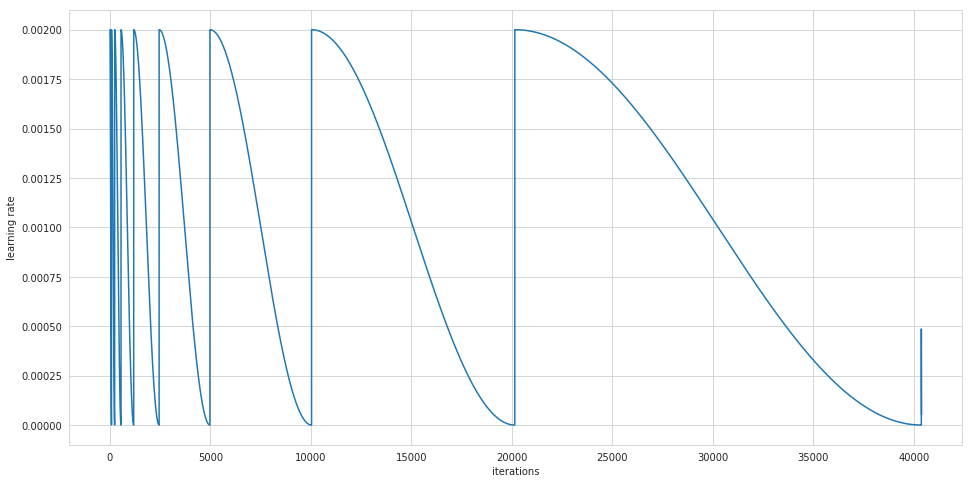

Fold took 895.813s


______________________________________
Training finished
Cross-validation took 7098.696s 
Mean loss = 3.18e-05 +- 1e-07
Mean AUC = 0.0988 +- 0.0006
Mean cut = 0.958 +- 0.008
Mean wAUC = 0.0638 +- 0.0004
Mean AMS = 4.0 +- 0.1
______________________________________



In [9]:
results, histories = batchTrainClassifier(trainData, nSplits, getModel, 
                                          newModelArgs,
                                          trainParams, trainOnWeights=True, maxEpochs=maxEpochs,
                                          cosAnnealMult=2, plotLR=1, reduxDecay=1,
                                          patience=patience, verbose=1, amsSize=250000)

The impact of data augmentation is pretty clear. Comparing the training here to that of the the CRL Swish model without augmentation we can see that we effectively gain another LR cycles worth of training epochs before we start overfitting, which allows the networks to reach much lower looses (3.18e-5 c.f. 3.23e-5) and a higher AMSs (3.98 c.f. 3.71)

## Construct ensemble

In [7]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [10]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs, custom_objects=custom_objects)

('Choosing ensemble by', 'loss')
('Model', 0, 'is', 7, 'with', 'loss', '=', 3.1252079985157974e-05)
('Model', 1, 'is', 6, 'with', 'loss', '=', 3.1266003094788174e-05)
('Model', 2, 'is', 4, 'with', 'loss', '=', 3.166614254878368e-05)
('Model', 3, 'is', 3, 'with', 'loss', '=', 3.167334627069067e-05)
('Model', 4, 'is', 2, 'with', 'loss', '=', 3.1696407468526994e-05)
('Model', 5, 'is', 5, 'with', 'loss', '=', 3.177660680521513e-05)
('Model', 6, 'is', 8, 'with', 'loss', '=', 3.180818945721361e-05)
('Model', 7, 'is', 9, 'with', 'loss', '=', 3.222119592772212e-05)
('Model', 8, 'is', 1, 'with', 'loss', '=', 3.227396485995596e-05)
('Model', 9, 'is', 0, 'with', 'loss', '=', 3.233367603436865e-05)


## Response on validation data without TTA

In [11]:
valData = BatchYielder(h5py.File(dirLoc + 'val.hdf5', "r+"))

In [12]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000873117399216s per sample

Predicting batch 2 out of 10
Prediction took 0.000243552398682s per sample

Predicting batch 3 out of 10
Prediction took 0.000234756994247s per sample

Predicting batch 4 out of 10
Prediction took 0.000243768215179s per sample

Predicting batch 5 out of 10
Prediction took 0.000230420589447s per sample

Predicting batch 6 out of 10
Prediction took 0.000232336425781s per sample

Predicting batch 7 out of 10
Prediction took 0.00024144320488s per sample

Predicting batch 8 out of 10
Prediction took 0.000244673633575s per sample

Predicting batch 9 out of 10
Prediction took 0.000243551588058s per sample

Predicting batch 10 out of 10
Prediction took 0.000233655834198s per sample



In [13]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source)),
                                                           roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source), sample_weight=getFeature('weights', valData.source))))

Testing ROC AUC: unweighted 0.903441126896, weighted 0.936007816299


In [13]:
amsScanSlow(convertToDF(valData.source))

50000 candidates loaded


(3.904678569217358, 0.9597285)

In [14]:
%%time
bootstrapMeanAMS(convertToDF(valData.source), N=512)

50000 candidates loaded

Mean AMS=4.0+-0.2, at mean cut of 0.96+-0.01
Exact mean cut 0.9617856123950332, corresponds to AMS of 3.8858269819333286
CPU times: user 684 ms, sys: 8.5 s, total: 9.19 s
Wall time: 38.5 s


(4.0, 0.96)

With test-time augmentation we improve on 4_Model_Swish_Cyclical-LR in all metrics on validation data: overall AMS 3.77->3.90, AMS corresponding to mean cut 3.72->3.89.

## Response on validation data with TTA

In [15]:
valData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'val.hdf5', "r+"), inputPipe=inputPipe,
                                  rotate = True, reflect = True, augRotMult=8)

In [16]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.004737834862599993s per sample

Predicting batch 2 out of 10
Prediction took 0.004787908256999981s per sample

Predicting batch 3 out of 10
Prediction took 0.00472892828339991s per sample

Predicting batch 4 out of 10
Prediction took 0.00471334293380005s per sample

Predicting batch 5 out of 10
Prediction took 0.0048470235139999205s per sample

Predicting batch 6 out of 10
Prediction took 0.004686572345999957s per sample

Predicting batch 7 out of 10
Prediction took 0.004735151436799969s per sample

Predicting batch 8 out of 10
Prediction took 0.0047189097217999005s per sample

Predicting batch 9 out of 10
Prediction took 0.004729269907999879s per sample

Predicting batch 10 out of 10
Prediction took 0.004849481185599871s per sample



In [17]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source)),
                                                           roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source), sample_weight=getFeature('weights', valData.source))))

Testing ROC AUC: unweighted 0.9037606723092108, weighted 0.9360955252424237


In [18]:
amsScanSlow(convertToDF(valData.source))

50000 candidates loaded


(3.966941152482784, 0.959765)

In [19]:
%%time
bootstrapMeanAMS(convertToDF(valData.source), N=512)

50000 candidates loaded

Mean AMS=4.0+-0.2, at mean cut of 0.962+-0.01
Exact mean cut 0.9619597619166598, corresponds to AMS of 3.9122062307167265
CPU times: user 458 ms, sys: 8.84 s, total: 9.29 s
Wall time: 38.6 s


(4.0, 0.962)

Adding test-time augmentation provides further benefits: overall AMS 3.90->3.97, AMS corresponding to mean cut 3.89->3.91.

# Test scoring

In [11]:
testData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'testing.hdf5', "r+"), inputPipe=inputPipe,
                                   rotate = True, reflect = True, augRotMult=8)

In [12]:
%%time
batchEnsemblePredict(ensemble, weights, testData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.003736206955599978s per sample

Predicting batch 2 out of 10
Prediction took 0.003723019516363638s per sample

Predicting batch 3 out of 10
Prediction took 0.0037412601151636245s per sample

Predicting batch 4 out of 10
Prediction took 0.0037683697776000123s per sample

Predicting batch 5 out of 10
Prediction took 0.00376735288072728s per sample

Predicting batch 6 out of 10
Prediction took 0.003799426003654563s per sample

Predicting batch 7 out of 10
Prediction took 0.003743513599072718s per sample

Predicting batch 8 out of 10
Prediction took 0.0037143907830909234s per sample

Predicting batch 9 out of 10
Prediction took 0.0037075131608909117s per sample

Predicting batch 10 out of 10
Prediction took 0.0037035181893091s per sample

CPU times: user 40min 54s, sys: 5min 59s, total: 46min 54s
Wall time: 34min 17s


In [28]:
scoreTestOD(testData.source, 0.9619597619166598)

Public:Private AMS: 3.6485448160879015 : 3.8176568398761934


(3.6485448160879015, 3.8176568398761934)

Using the cuts we optimised by bootstrapping the validation data, we end up with a private score which would have beaten the winning entry (3.817 c.f. 3.806). It would be nice if the public score were higher, though.

# Save/Load

In [4]:
name = "weights/Swish_CLR_TTA"

In [31]:
saveEnsemble(name, ensemble, weights, compileArgs, overwrite=1)

In [5]:
ensemble, weights, compileArgs, _, _ = loadEnsemble(name)

(50000, 'candidates loaded')


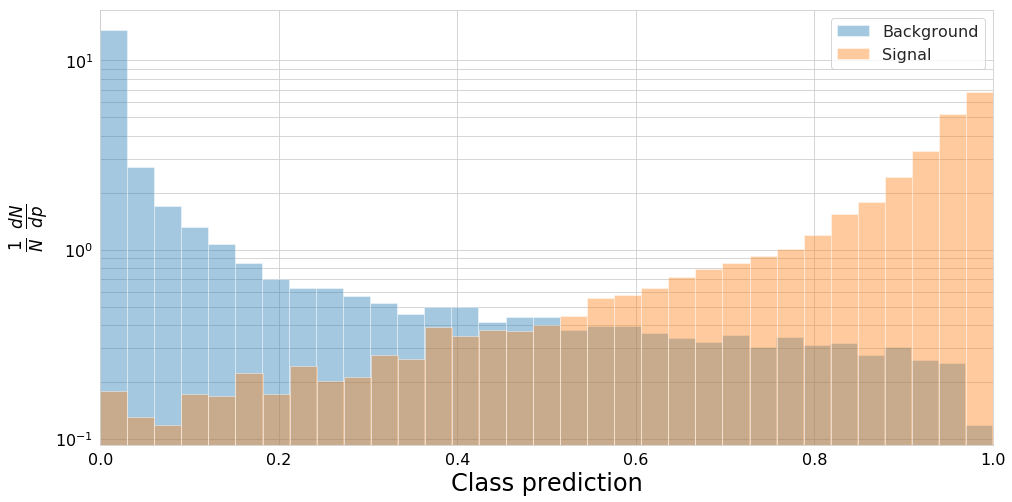

In [14]:
# TODO log-x

d = convertToDF(valData.source)
bkg_sig_dfs = [
    d[d['gen_target']==0],
    d[d['gen_target']==1],
]
getClassPredPlot(bkg_sig_dfs, weightName='gen_weight')

(50000, 'candidates loaded')
0 ROC AUC: 0.936007816299


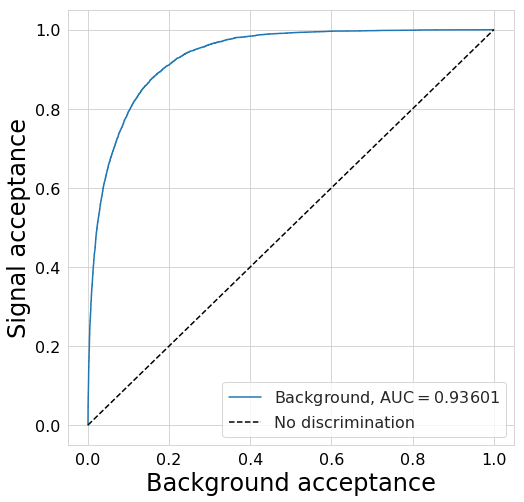

In [15]:
rocPlot([convertToDF(valData.source)], weightName='gen_weight', labels=['Background', 'Signal'])

(50000, 'candidates loaded')


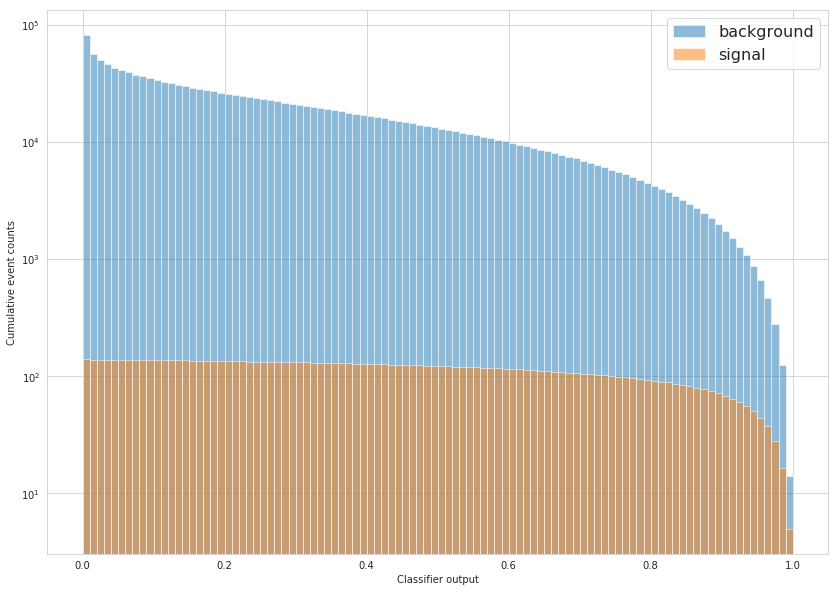

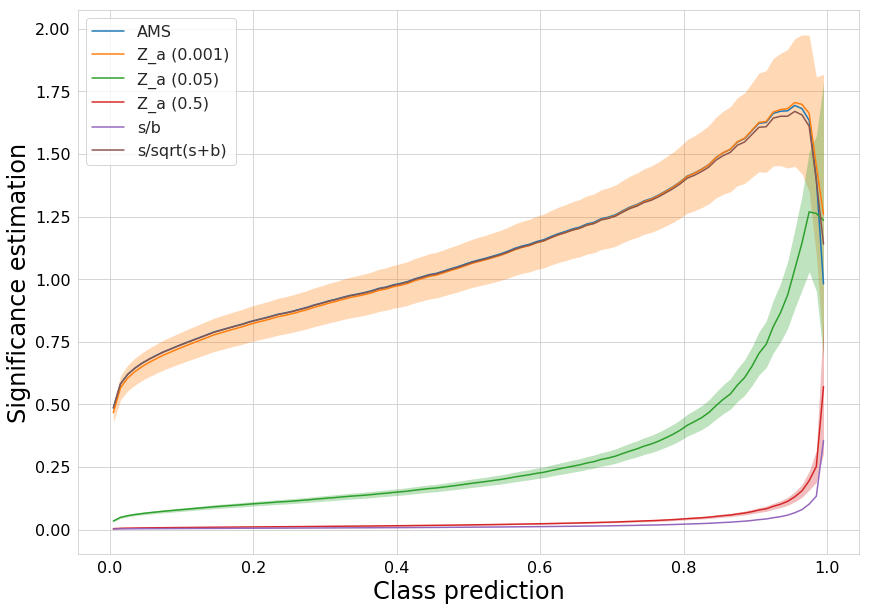

In [16]:
src = valData
#src = testData

from numpy import sqrt, log, power

def get_asimov(systematic):
    return lambda s,b: (Z_asimov(s,b, systematic), eZ_asimov(s,sqrt(s),b,sqrt(b),systematic))

h1 = plotSignificanceEstimate(
    convertToDF(src.source), 
    {
        's/b': lambda s,b: s/b,
        's/sqrt(s+b)': lambda s,b: s/np.sqrt(s+b),
        'Z_a (0.5)': get_asimov(0.5),
        'Z_a (0.05)': get_asimov(0.05),
        'Z_a (0.001)': get_asimov(0.001),
        'AMS': AMS,
#        'asimov err': lambda s,b: eZ(s,sqrt(s),b,sqrt(b)),
    },
    weightName='gen_weight',
    figsize=(14, 10),
    nBins=100,
)